In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

import src.visualization as vs
import src.process as process
import models.lib as modlib
import src.json_cleaning as jc

from sklearn.metrics import make_scorer, accuracy_score, fbeta_score, recall_score, precision_score
from sklearn.metrics import classification_report, roc_curve, confusion_matrix

In [2]:
data = pd.read_csv('data/processed/kickstarter_clean.csv')


In [3]:
data.head()

,backers_count,country,staff_pick,state,usd_pledged,usd_type,converted_goal,len_blurb,len_name,launch_to_deadline,creation_to_launch,month,weekday,day_hour,category_name,parent_category
0,47,US,False,1,1950.00,domestic,1000.00,22.0,4,2592000,700366,August,Thursday,17,Playing Cards,games
1,271,US,False,1,22404.00,international,15000.00,15.0,7,2592000,19433862,May,Monday,5,Rock,music
2,3,GB,False,0,165.38,domestic,12160.66,23.0,8,5180400,465105,January,Thursday,18,Playing Cards,games
3,3,US,False,1,2820.00,domestic,2800.00,24.0,7,2592000,354456,December,Monday,20,Nonfiction,publishing
4,35,US,False,1,3725.00,domestic,3500.00,18.0,4,2592000,13769396,April,Thursday,2,Classical Music,music


In [152]:
data2.category_slug.nunique()

15

In [94]:
data = data.drop(['usd_pledged','backers_count'], axis=1)

In [4]:
vs.nice_summary(data)

,Columns,Dtype,nunique,Non-Null Count,Missing,Missing %,Zero Count,mean,std,min,25%,50%,75%,max
0,backers_count,int64,3206,168979,-,-,14821,140.07,894.93,0.0,3.0,25.0,85.0,105857.0
1,country,object,22,168979,-,-,0,-,-,-,-,-,-,-
2,staff_pick,bool,2,168979,-,-,147323,-,-,-,-,-,-,-
3,state,int64,2,168979,-,-,74200,0.56,0.5,0.0,0.0,1.0,1.0,1.0
4,usd_pledged,float64,69802,168979,-,-,14821,12110.97,83739.29,0.0,100.0,1457.0,6235.0,8596474.58
5,usd_type,object,2,168959,20,0.01,0,-,-,-,-,-,-,-
6,converted_goal,float64,45238,168979,-,-,0,41096.88,1110956.93,0.01,1500.0,5000.0,13297.7,152350076.0
7,len_blurb,float64,35,168977,2,-,0,19.01,4.98,1.0,16.0,20.0,22.0,35.0
8,len_name,int64,20,168979,-,-,0,5.71,2.71,1.0,4.0,6.0,8.0,27.0
9,launch_to_deadline,int64,47963,168979,-,-,0,2821257.19,1015877.11,86400.0,2588400.0,2592000.0,2948818.5,8044324.0


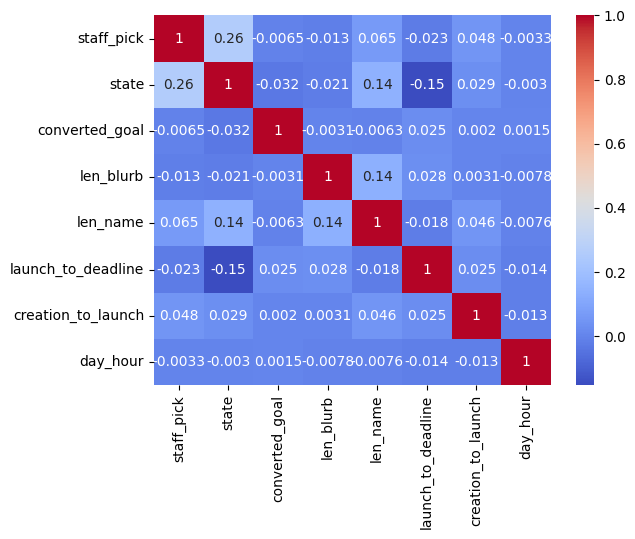

In [96]:
# Create a correlation matrix
corr = data.corr()

# Create a heatmap using seaborn
sns.heatmap(corr, cmap="coolwarm", annot=True)

# Show the plot
plt.show()

In [40]:
#Base line model
result = fbeta_score(data.state, data.staff_pick, beta = 0.5)
print(result)

0.5348312872444227


In [42]:
result1 = classification_report(data.state, data.staff_pick)
print(result1)

              precision    recall  f1-score   support

           0       0.49      0.97      0.65     74200
           1       0.90      0.20      0.33     94779

    accuracy                           0.54    168979
   macro avg       0.69      0.59      0.49    168979
weighted avg       0.72      0.54      0.47    168979



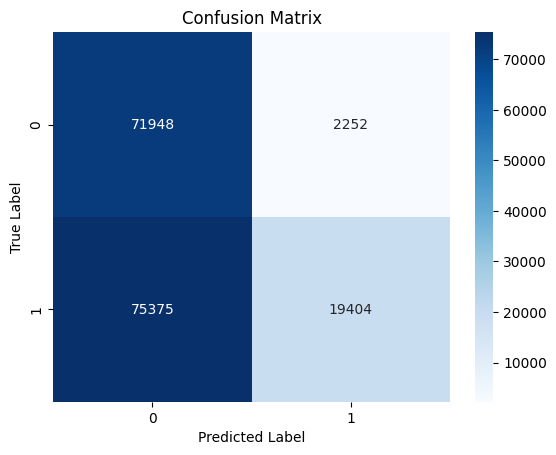

In [6]:
# Calculate the confusion matrix of the base line model
cm = confusion_matrix(data.state, data.staff_pick)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [7]:
df = data.copy()
df.head()

,backers_count,country,staff_pick,state,usd_pledged,usd_type,converted_goal,len_blurb,len_name,launch_to_deadline,creation_to_launch,month,weekday,day_hour,category_name,parent_category
0,47,US,False,1,1950.00,domestic,1000.00,22.0,4,2592000,700366,August,Thursday,17,Playing Cards,games
1,271,US,False,1,22404.00,international,15000.00,15.0,7,2592000,19433862,May,Monday,5,Rock,music
2,3,GB,False,0,165.38,domestic,12160.66,23.0,8,5180400,465105,January,Thursday,18,Playing Cards,games
3,3,US,False,1,2820.00,domestic,2800.00,24.0,7,2592000,354456,December,Monday,20,Nonfiction,publishing
4,35,US,False,1,3725.00,domestic,3500.00,18.0,4,2592000,13769396,April,Thursday,2,Classical Music,music


<AxesSubplot:xlabel='staff_pick', ylabel='count'>

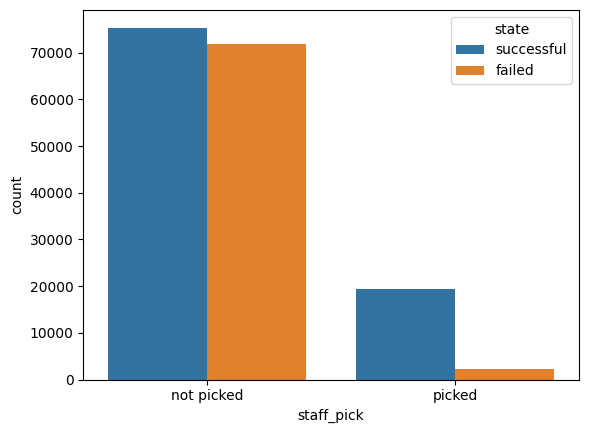

In [8]:
df['state'] = data['state'].replace({0:'failed', 1 :'successful'})
df['staff_pick'] = data['staff_pick'].replace({True:'picked', False:"not picked"})
sns.countplot(data = df, x = 'staff_pick', hue = 'state')

<AxesSubplot:xlabel='Name length in words', ylabel='count'>

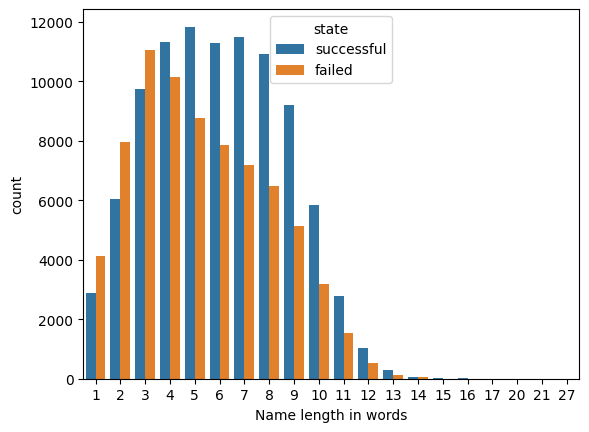

In [9]:
df.rename(columns={'len_name': 'Name length in words', 'len_blurb' : 'Description length in words'}, inplace = True)
sns.countplot(data = df, x = 'Name length in words', hue = 'state')

<AxesSubplot:xlabel='Name length in words', ylabel='state'>

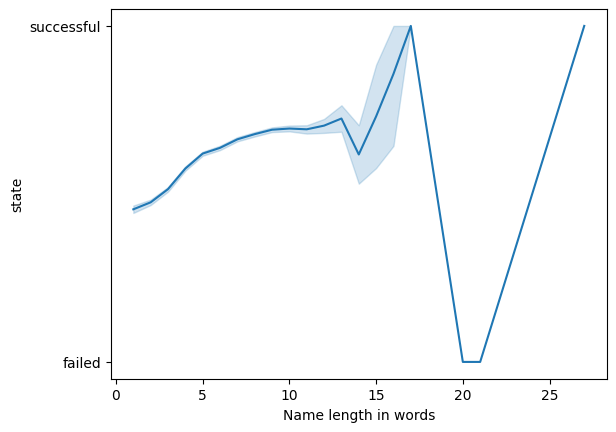

In [33]:
sns.lineplot(data = df, x ='Name length in words', y = 'state')

<AxesSubplot:xlabel='Description length in words', ylabel='count'>

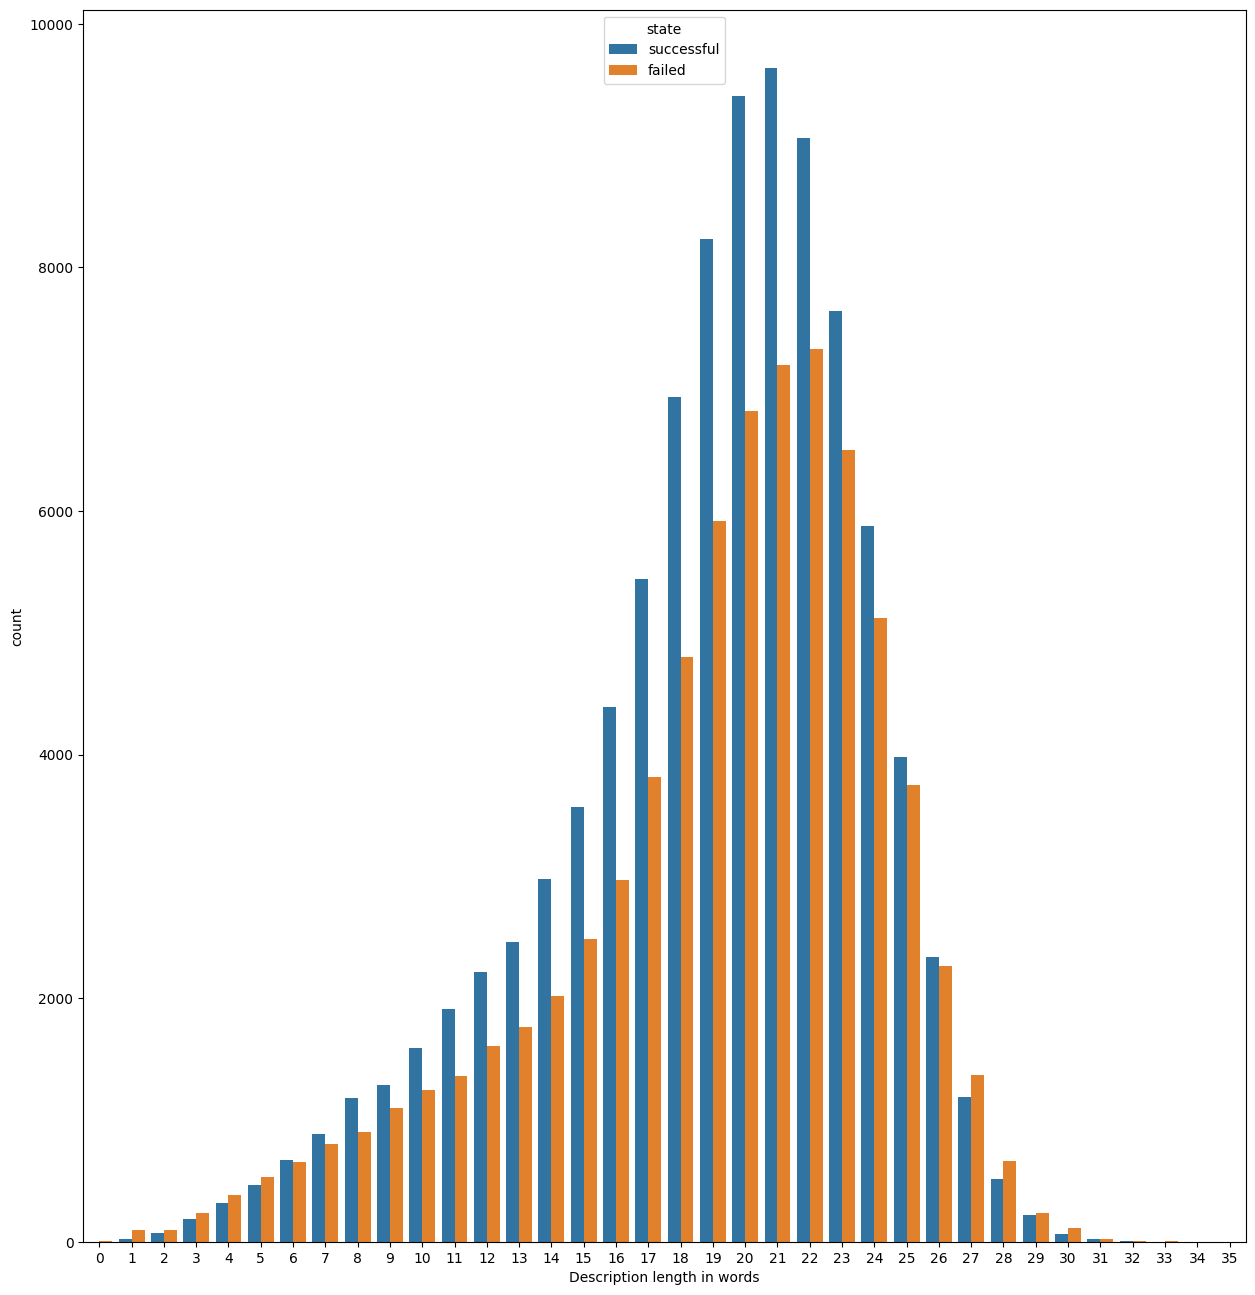

In [12]:
plt.subplots(figsize=(15, 16))
df['Description length in words'].fillna(0, inplace = True)
df['Description length in words'] = df['Description length in words'].astype(int)
sns.countplot(data = df, x = 'Description length in words', hue= 'state')

In [35]:
df.columns

Index(['country', 'staff_pick', 'state', 'converted_goal',
       'Description length in words', 'Name length in words',
       'launch_to_deadline', 'creation_to_launch', 'category_name'],
      dtype='object')

<AxesSubplot:xlabel='Run time in days', ylabel='count'>

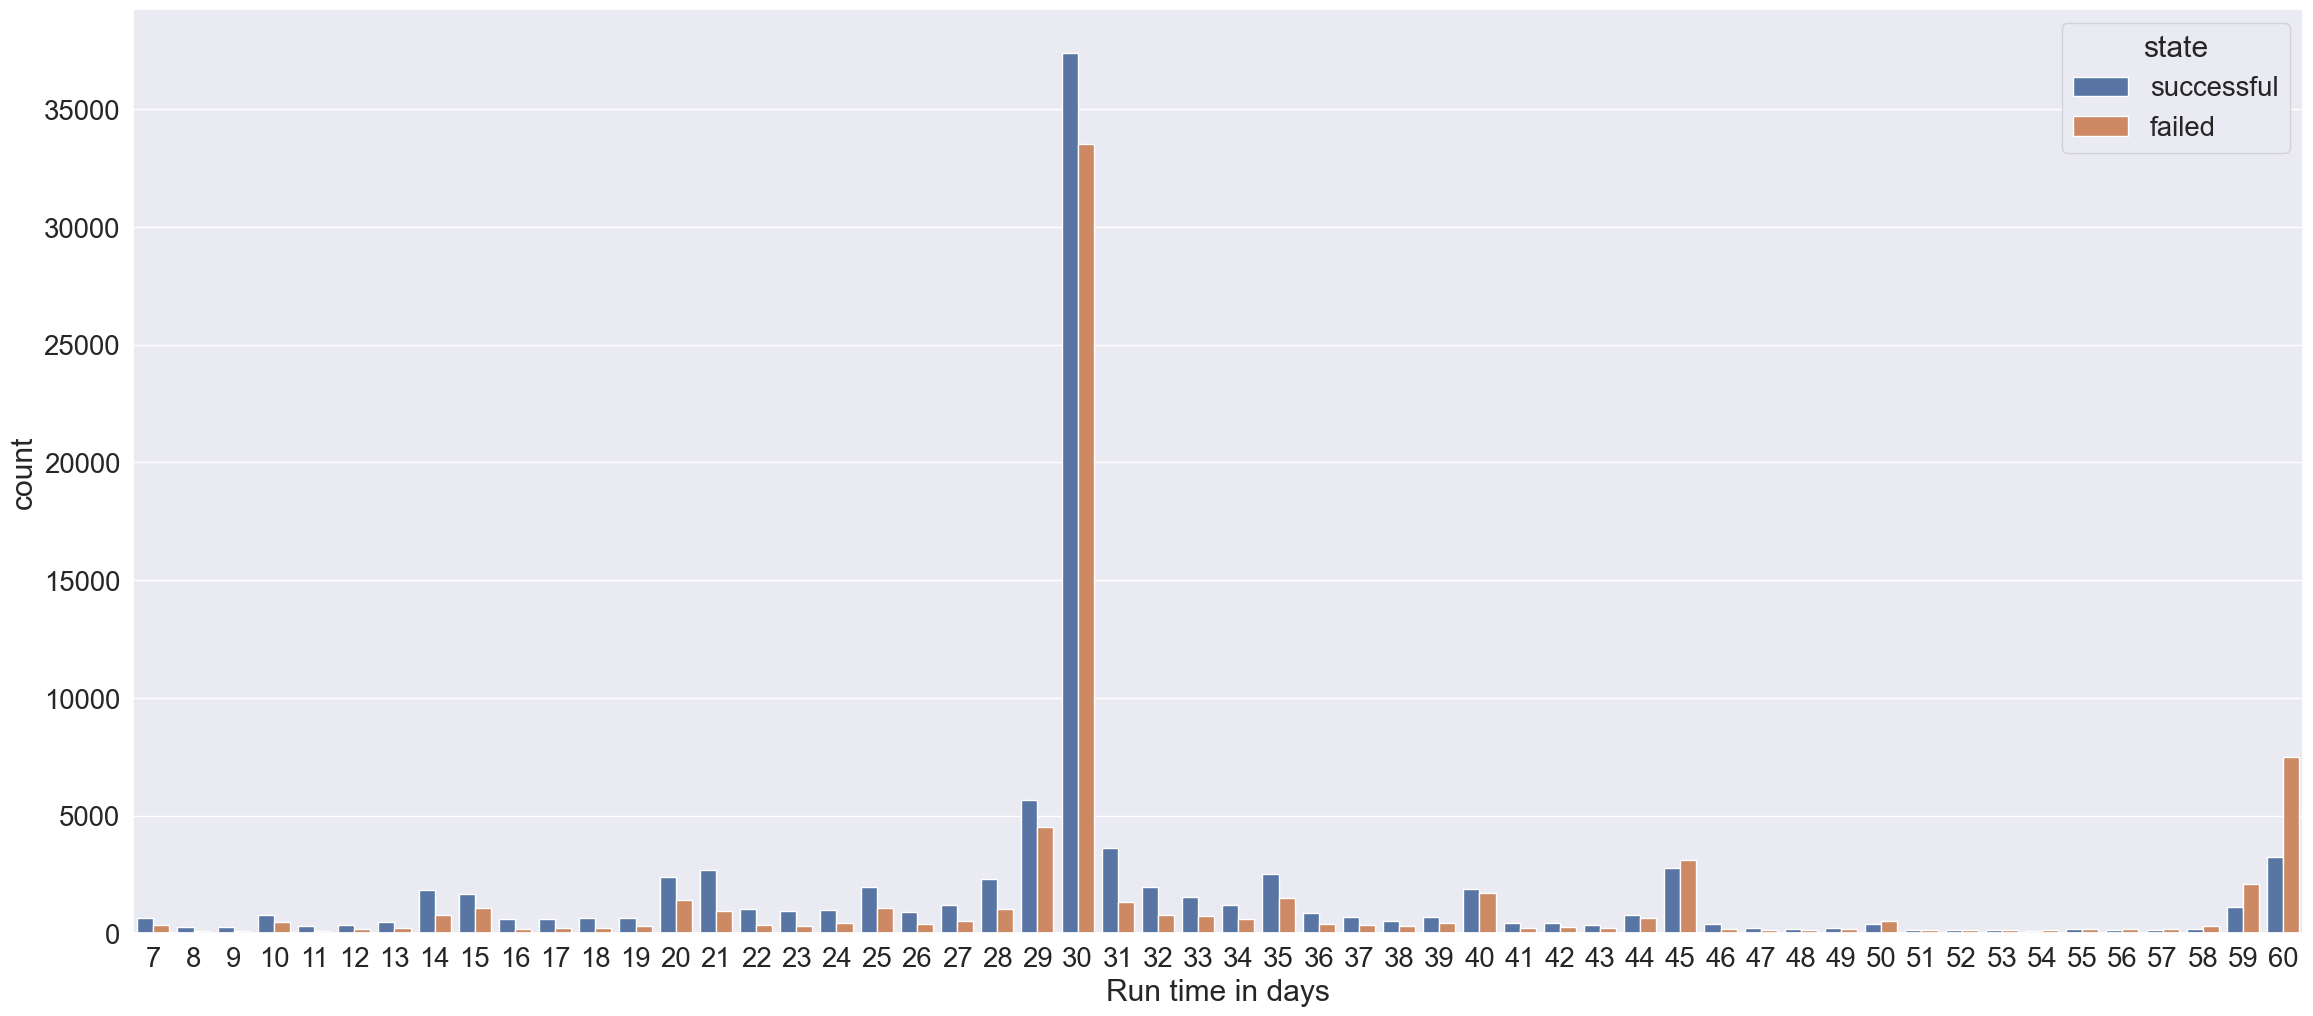

In [106]:
sns.set(font_scale=1.8)  
plt.subplots(figsize=(28, 12))
df['Run time in days'] = df.launch_to_deadline/60/60//24
df['Run time in days'] = df['Run time in days'].astype(int)

filtered = df[(df['Run time in days'] < 61) & (df['Run time in days'] > 6)]

sns.countplot(data = filtered, x = 'Run time in days', hue = 'state')


In [24]:
df.head()

,backers_count,country,staff_pick,state,usd_pledged,usd_type,converted_goal,Description length in words,Name length in words,launch_to_deadline,creation_to_launch,month,weekday,day_hour,category_name,parent_category
0,47,US,not picked,successful,1950.00,domestic,1000.00,22.0,4,2592000,700366,August,Thursday,17,Playing Cards,games
1,271,US,not picked,successful,22404.00,international,15000.00,15.0,7,2592000,19433862,May,Monday,5,Rock,music
2,3,GB,not picked,failed,165.38,domestic,12160.66,23.0,8,5180400,465105,January,Thursday,18,Playing Cards,games
3,3,US,not picked,successful,2820.00,domestic,2800.00,24.0,7,2592000,354456,December,Monday,20,Nonfiction,publishing
4,35,US,not picked,successful,3725.00,domestic,3500.00,18.0,4,2592000,13769396,April,Thursday,2,Classical Music,music


In [ ]:
# Create a histogram with hue
sns.histplot(data=df, x="converted_goal", hue="state", kde=True)

<AxesSubplot:xlabel='usd_type', ylabel='count'>

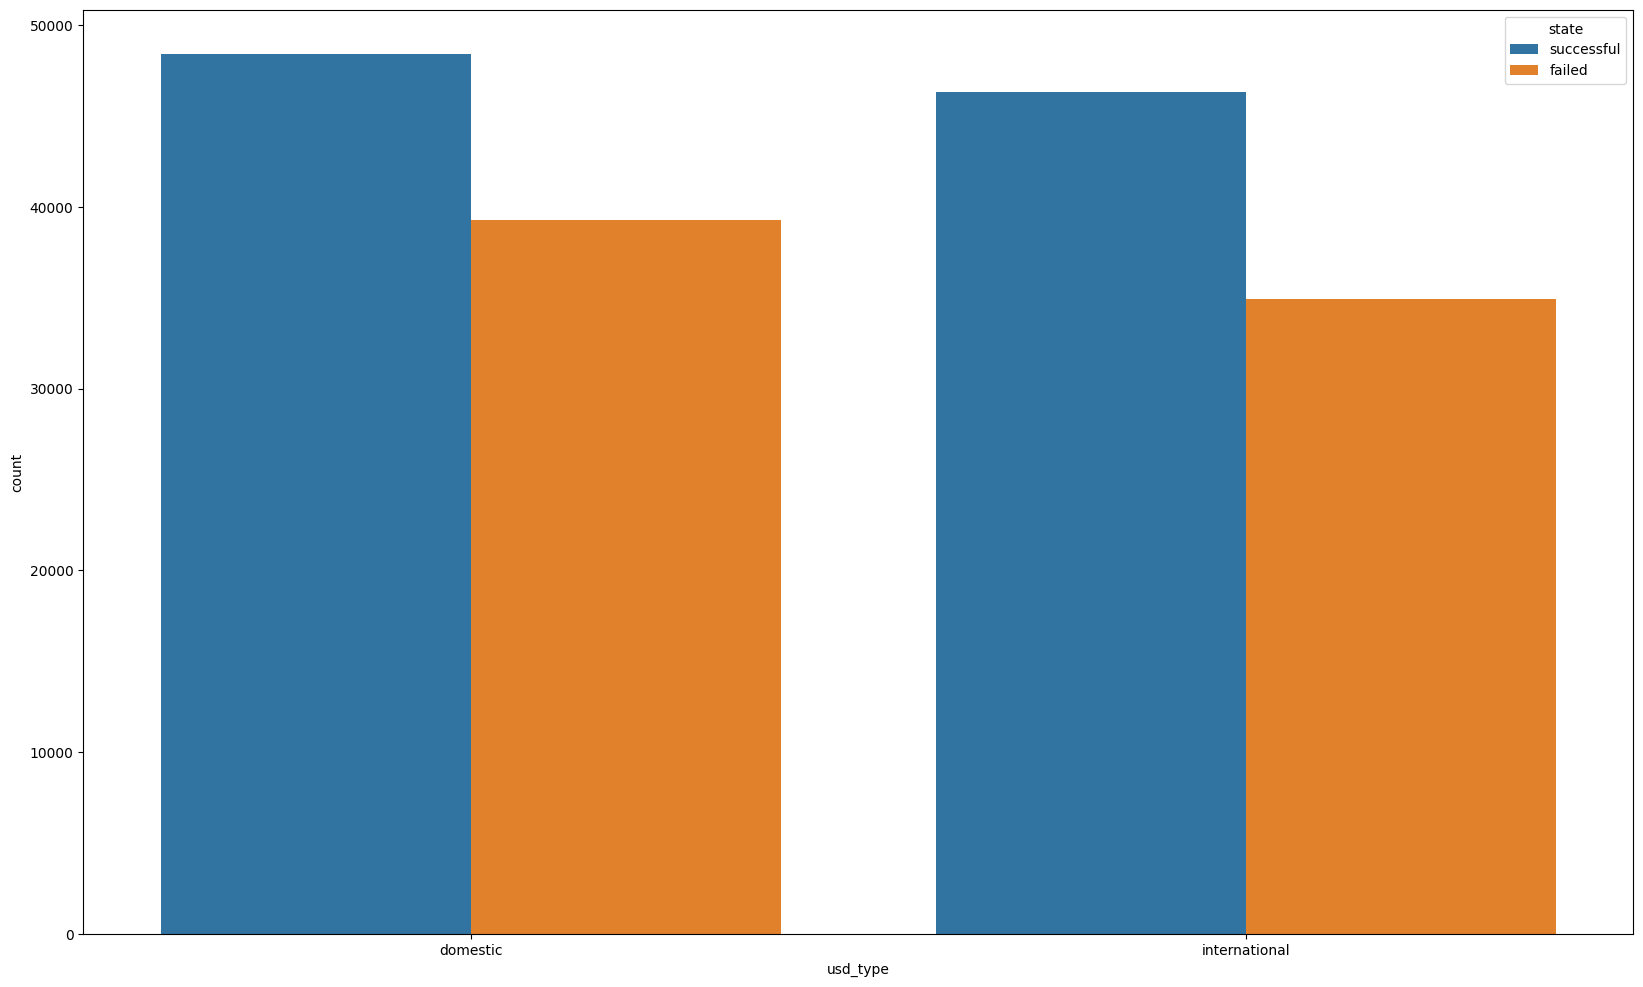

In [12]:
plt.subplots(figsize=(20, 12))
sns.countplot(data = df, x= 'usd_type', hue = 'state')

<AxesSubplot:xlabel='country'>

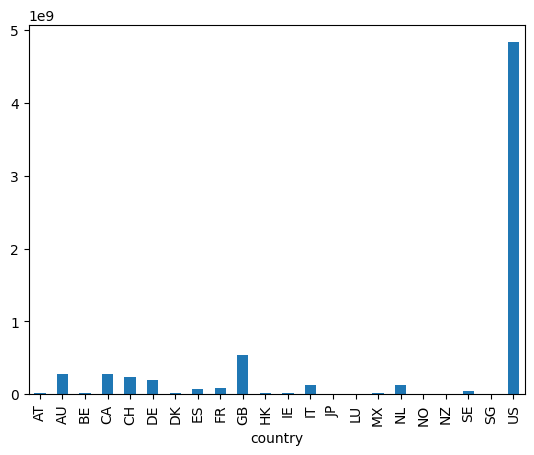

In [13]:
df.groupby('country').converted_goal.sum().plot(kind='bar')

<AxesSubplot:xlabel='parent_category'>

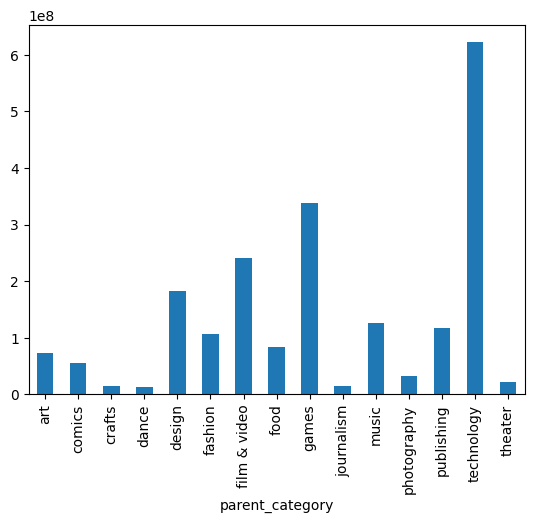

In [14]:
df.groupby('parent_category').usd_pledged.sum().plot(kind='bar')

<AxesSubplot:xlabel='month'>

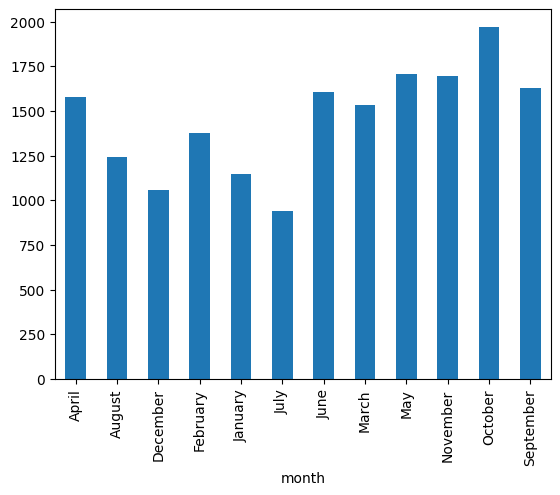

In [15]:
df.groupby('month').usd_pledged.median().plot(kind='bar')

In [34]:
df.rename(columns={'parent_category': 'Main category'}, inplace = True)
test = df.query('state == "successful"').groupby(['Main category']).size() / df.groupby(['Main category']).size() * 100

Text(0.5, 1.0, 'Percentage of successful projects per category')

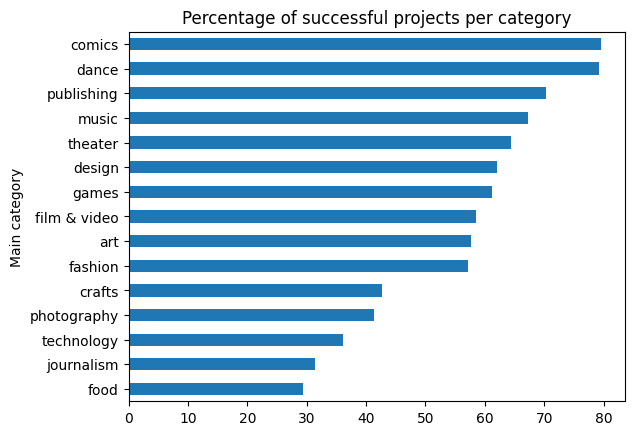

In [35]:
test.sort_values(ascending=True).plot(kind = 'barh')
plt.title('Percentage of successful projects per category')

In [18]:
countries = df.query('state ==1').groupby(['country']).size() / df.groupby(['country']).size()

<AxesSubplot:xlabel='country'>

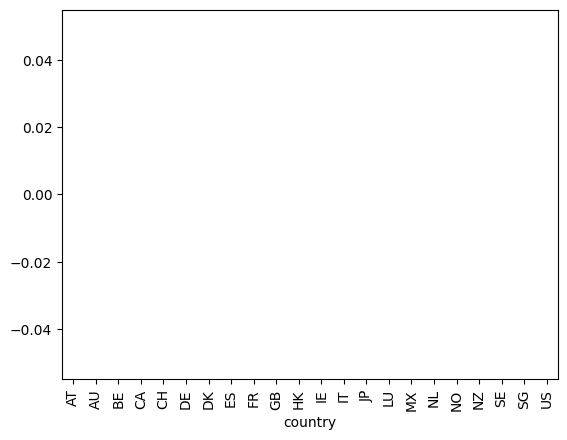

In [19]:
countries.sort_values(ascending=False).plot(kind = 'bar')

In [20]:
pledged = df.query('state ==1').groupby(['usd_pledged']).size() / df.groupby(['usd_pledged']).size()

In [21]:
pledged.sort_values()

usd_pledged
0.00         NaN
0.46         NaN
0.48         NaN
0.49         NaN
0.50         NaN
              ..
5764229.38   NaN
6225354.98   NaN
6297404.67   NaN
6333295.77   NaN
8596474.58   NaN
Length: 69802, dtype: float64

In [74]:
test = df.query('state == 1')
(test['usd_pledged'].sum() * 0.5) / 10

98266037.36150002

In [56]:
pledged.sort_values(ascending=False).plot(kind = 'bar')

<AxesSubplot:xlabel='usd_pledged'>

<AxesSubplot:xlabel='parent_category'>

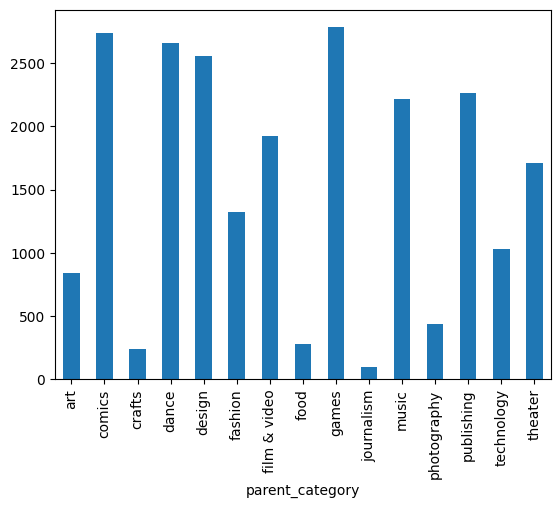

In [22]:
df.groupby('parent_category').usd_pledged.median().plot(kind='bar')